##Домашняя работа #1.
##Image pre-processing.

В этой домашней работе мы попробуем поприменять самые простые способы обработки изображений.

* Soft deadline: **20.02.2023 03:00:00 +0003 GMT**
* Hard deadline: **27.02.2023 03:00:00 +0003 GMT**

In [ ]:
import cv2
import matplotlib.pylab as plt
%matplotlib inline
import numpy as np
from google.colab.patches import cv2_imshow
import itertools

In [ ]:
def show_img(img):
  plt.axis('off')
  plt.imshow(img)

##### Задача 1 (3 балла)

Загрузите изображение *lena.png* в переменную **lena**. Отобразите результат на экран. Убедитесь, что `opencv` открывает изображение в формате BGR, переведите его в RGB несколькими способами:
* c помощью функций split & merge
* с помощью индексации в numpy
* с помощью cvtColor

In [ ]:
lena = cv2.imread('lena.png')

In [ ]:
lena.shape

(512, 512, 3)

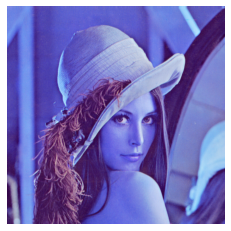

In [ ]:
show_img(lena)

### Переведем BGR в RGB

С помощью cvtColor()

In [ ]:
lena_rgb_cvt = cv2.cvtColor(lena, cv2.COLOR_BGR2RGB)

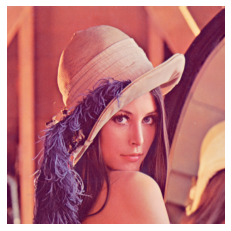

In [ ]:
show_img(lena_rgb_cvt)

С помощью функций split, merge

In [ ]:
b, g, r = cv2.split(lena)
lena_rgb_merge = cv2.merge((r, g, b))

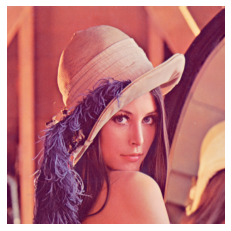

In [ ]:
show_img(lena_rgb_merge)

С помощью индексации в numpy

In [ ]:
lena_rgb_numpy = lena[:, :, [2, 1, 0]]

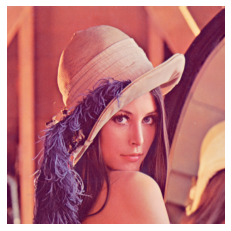

In [ ]:
show_img(lena_rgb_numpy)

## **Далее будем работать с Леной в RGB**

In [ ]:
lena = lena[:, :, [2, 1, 0]]

##### Задача 2 (3 балла)

Поменяйте местами левую верхнюю и правую нижнюю четвертинки изображения **lena** и отобразите результат на экран.

In [ ]:
lena_copy = np.copy(lena)
h, w, channels = lena_copy.shape

In [ ]:
lena_copy[:w//2, :h//2, :], lena_copy[w//2:, h//2:, :] = lena[w//2:, h//2:, :], lena[:w//2, :h//2, :]

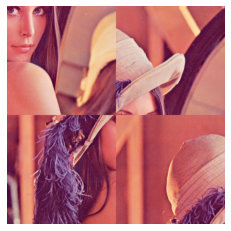

In [ ]:
show_img(lena_copy)

##### Задача 3 (3 балла)

Усредните значения всех трех цветовых каналов **lena** в каждый из каналов итогового изображения **lena_gray_my**. Переведите исходное цветное изображение lena в изображение в градациях серого с помощью функции cvtColor. (lena_gray_cvt). Вычислите модуль разности между изображениями **lena_gray_my** и **lena_gray_cvt** и отобразите ее на экране.

Попробуем сначала не усреднять значения в каждый из каналов и отображать одноканальное изображение


*Заметки для себя: работаем с типом int64, тк при uint с отрицательными числами (например, когда считаем разность между двумя изображениями) происходит что-то странное*

In [ ]:
lena_gray_my = np.mean(lena, axis=2, dtype='int64')
lena_gray_cvt = cv2.cvtColor(lena, cv2.COLOR_RGB2GRAY)
lena_gray_cvt = lena_gray_cvt.astype('int64')
print(lena_gray_my.dtype == lena_gray_cvt.dtype)

True


In [ ]:
diff = np.abs(lena_gray_my - lena_gray_cvt)

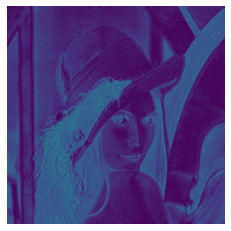

In [ ]:
show_img(diff)

In [ ]:
lena_gray_my = np.zeros_like(lena)
fill_value = np.mean(lena, axis=2, dtype='int64')
lena_gray_my[:,:,0] = fill_value
lena_gray_my[:,:,1] = fill_value
lena_gray_my[:,:,2] = fill_value

In [ ]:
lena_gray_cvt = np.zeros_like(lena)
fill_value = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY)
lena_gray_cvt[:,:,0] = fill_value
lena_gray_cvt[:,:,1] = fill_value
lena_gray_cvt[:,:,2] = fill_value
lena_gray_cvt = lena_gray_cvt.astype(dtype='int64')

In [ ]:
diff = np.abs(lena_gray_my - lena_gray_cvt)

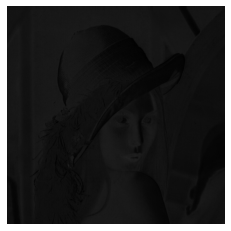

In [ ]:
show_img(diff)

##### Задача 4 (3 балла)
Переведите изображение **lena** в одно из цветовых пространств (cvtColor) с выделенной координатой яркости (HSV, HSL, HSB, CIE Lab), инвертируйте яркостную составляющую, переведите обратно в RGB. Отобразите результат.

In [ ]:
"""
lena_hsv = cv2.cvtColor(lena, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(lena_hsv)
v = 255 - v
hsv_new = cv2.merge((h,s,v))
lena_new = cv2.cvtColor(hsv_new, cv2.COLOR_HSV2RGB)
"""

'\nlena_hsv = cv2.cvtColor(lena, cv2.COLOR_RGB2HSV)\nh, s, v = cv2.split(lena_hsv)\nv = 255 - v\nhsv_new = cv2.merge((h,s,v))\nlena_new = cv2.cvtColor(hsv_new, cv2.COLOR_HSV2RGB)\n'

In [ ]:
lena_hsv = cv2.cvtColor(lena, cv2.COLOR_RGB2HSV)
lena_hsv[:, :, 2] = 255 - lena_hsv[:, :, 2]
lena_new = cv2.cvtColor(lena_hsv, cv2.COLOR_HSV2RGB)

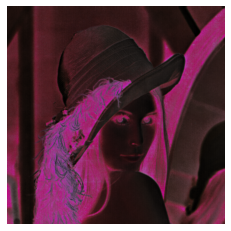

In [ ]:
show_img(lena_new)

##### Задача 5 (3 балла)

По цветному изображению **lena** на входе сгенерируйте 6 цветных изображений, полученных путем перестановки значений цветовых каналов r, g и b. исходного изображения. Соберите коллаж $3x2$ и отобразите его на экране.

In [ ]:
perm = list(itertools.permutations([0, 1, 2]))

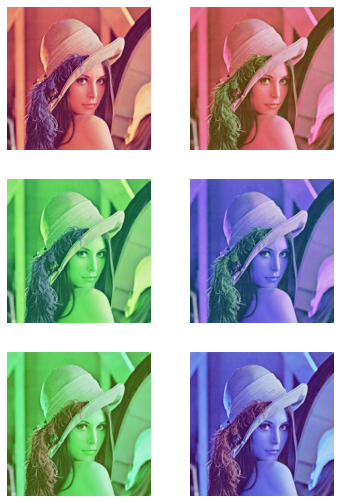

In [ ]:
figure = plt.figure(figsize=(6,9))
rows, cols = 3, 2
for i in range(1, cols * rows + 1):
  figure.add_subplot(rows, cols, i)
  plt.axis('off')
  plt.imshow(lena[:, :, perm[i - 1]])

plt.show()

####Задача 6 (3 балла)
Переведите изображение **lena** в градации серого. Примените к серому изображению операцию линейного растяжения диапазона яркостей ( 𝑛𝑜𝑟𝑚𝑎𝑙𝑖𝑧𝑒 ) и эквализации гистограммы ( 𝑒𝑞𝑢𝑎𝑙𝑖𝑧𝑒𝐻𝑖𝑠𝑡 ). Постройте разность полученных результатов. Состыкуйте в одно изображение в градациях серого результат линейного растяжения, эквализации и их разности

Чтобы картинки корректно отображались, будем использовать cv2_imshow() и lena в BGR

In [ ]:
lena = cv2.imread('lena.png')

In [ ]:
lena_gray = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY)

lena_equalized = cv2.equalizeHist(lena_gray)
lena_equalized = lena_equalized.astype('int64')

lena_normalized = cv2.normalize(lena_gray, None, 0, 255, cv2.NORM_MINMAX)
lena_normalized = lena_normalized.astype('int64')

lena_gray = lena_gray.astype('int64')

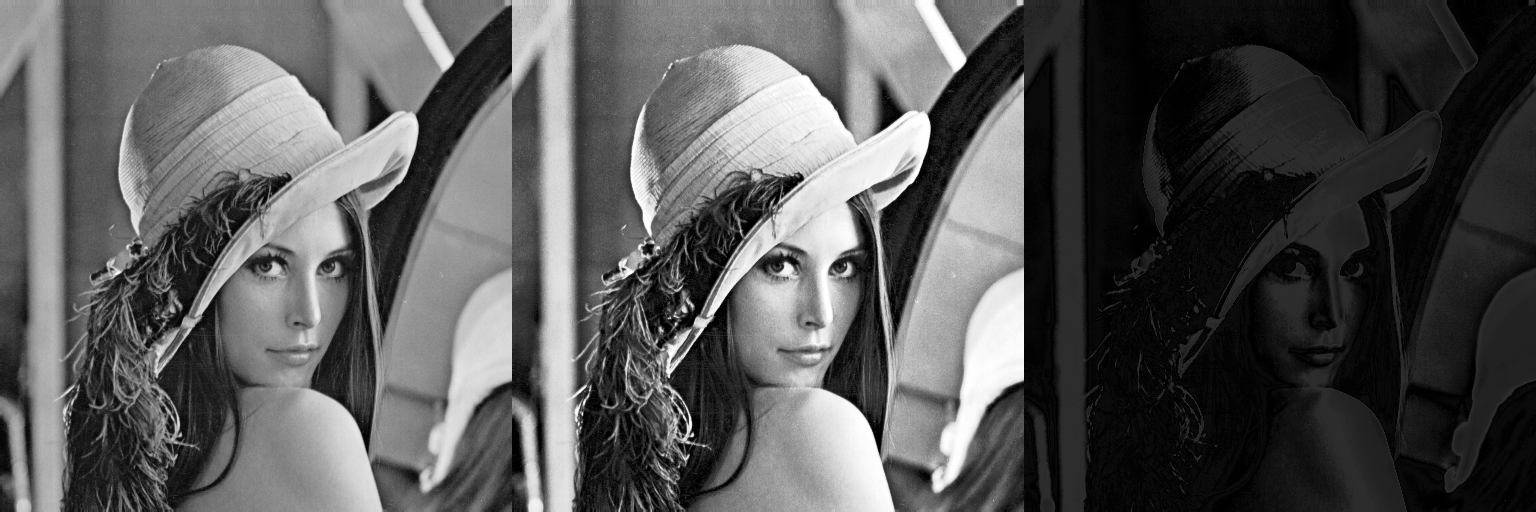

In [ ]:
diff = np.abs(lena_equalized - lena_normalized)
img = np.hstack((lena_normalized, lena_equalized, diff))
cv2_imshow(img)

####Задача 7 (3 балла)
Реализуйте функцию добавления шума «соль и перец» для одноканального изображения. Входные параметры: $src$ – исходная одноканальная матрица $Mat$, $p$ – вероятность замещения исходных значений на $0$, $q$ – вероятность замещения исходных значений на $255$. Загрузите изображение $lena.jpg$, выделите каналы изображения в отдельные матрицы ($split$), добавьте шум «соль и перец» в каждый канал при помощи реализованной Вами функции с параметрами

1. $p=q=0.05$
2. $p=q=0.1$
3. $p=q=0.15$

In [ ]:
def saltpepper_noise(src, p, q):
  src_copy = src.copy()
  size = src_copy.shape[0]
  peppered_pixels = int(p * size**2)
  salted_pixels = int(q * size**2)

  x = np.random.randint(0, size - 1, salted_pixels)
  y = np.random.randint(0, size - 1, salted_pixels)
  src_copy[x,y] = 255

  x = np.random.randint(0, size-1, peppered_pixels)
  y = np.random.randint(0, size-1, peppered_pixels)
  src_copy[x,y] = 0

  return src_copy

In [ ]:
proba = [(0.05, 0.05), (0.1, 0.1), (0.15, 0.15)]
imgs = []
for p, q in proba:
  img = np.copy(lena)
  for i in range(3):
    img[:, :, i] = saltpepper_noise(img[:, :, i], p, q)
  imgs.append(img)

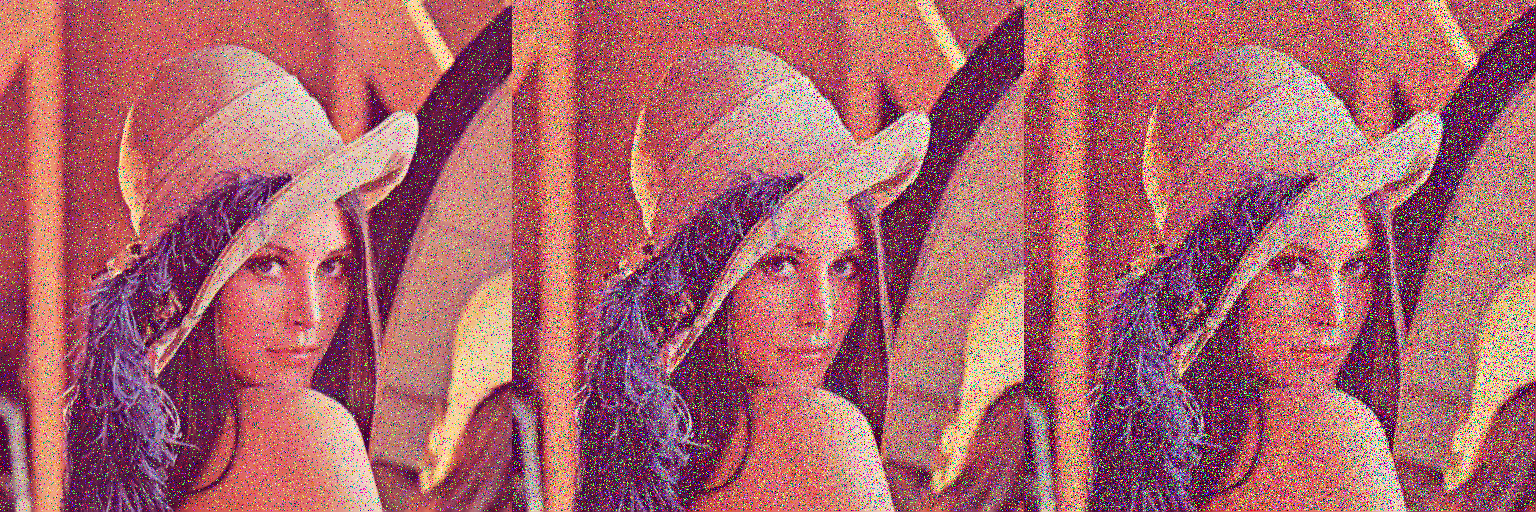

In [ ]:
cv2_imshow(np.hstack(imgs))

####Задча 8 (3 балла)
Реализуйте функцию пространственной фильтрации изображения однородным усредняющим фильтром размера $n \times n$ (все коэффициенты маски равны $\frac{1}{n^2}$). При вычислении среднего используйте тот факт, что при переходе от точки к точке обновляется только часть элементов изображения под маской. Примените реализованный фильтр к предварительно переведенному в градации серого изображению $lena.jpg$ при $n = 3$ и $n = 5$. Визуализируйте изображение, представляющее собой разность полученных результатов фильтрации.

In [ ]:
lena_gray = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY)

Применим паддинг к исходному изображению, чтобы после фильтрации получились картинки одного размера

In [ ]:
def calc_prefixes(img):
  n, m = img.shape
  prefixes = np.zeros((n, m+1))
  for i in range(n):
    for j in range(1, m+1):
      prefixes[i][j] = prefixes[i][j-1] + img[i][j-1]

  return prefixes

In [ ]:
def calc_average(prefixes, i, j, step):
  ans = 0
  for k in range(step):
    ans += prefixes[i+k][j+step] - prefixes[i+k][j]
  return ans

In [ ]:
def filter_img(img, filter_size, padding):
  n, m = img.shape
  step = filter_size
  filter = np.full((filter_size, filter_size), 1 / filter_size**2)
  img = cv2.copyMakeBorder(img, padding, padding, padding, padding, cv2.BORDER_CONSTANT, 0)
  pr = calc_prefixes(img)
  res = np.zeros((n, m))
  for i in range(n):
    for j in range(m):
      res[i][j] = calc_average(pr, i, j, step)
  return res * 1 / filter_size**2

In [ ]:
lena_filtered_3 = filter_img(lena_gray, 3, 1).astype('int64')
lena_filtered_5 = filter_img(lena_gray, 5, 2).astype('int64')

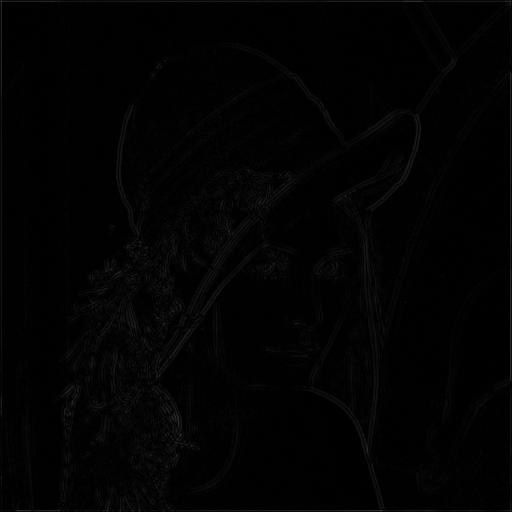

In [ ]:
cv2_imshow(np.abs(lena_filtered_5 - lena_filtered_3))

####Задача 9 (6 баллов)
С помощью [виджетов](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html) создайте 2 слайдера с настройками параметров гамма-коррекции. Отобразите **lena**, ее гамма-преобразование и график в диапозоне от [0;1], так, чтобы параметры слайдера соответствовали параметрам гамма-коррекции. Отдельно выведите изображение **lena** с гаммой равной 2.

In [ ]:
import ipywidgets as w

In [ ]:
def plot_gamma(c, g):
  x = np.linspace(0, 1, 100)
  y = (c * (x ** g))
  img = (c * (lena_rgb_cvt / 255.0) ** g) * 255.0
  img = np.clip(img, 0, 255)
  img = img.astype('int64')

  fig = plt.figure(figsize=(10, 5))
  ax1 = fig.add_subplot(1, 2, 1)
  ax1.plot(x,y)
  ax1.set(xlim = [0, 1],
       ylim = [0, 1])
  ax1.grid()
  ax2 = fig.add_subplot(1, 2, 2)
  ax2.imshow(img)
  ax2.axis("off")
  plt.show()

In [ ]:
w.interact(plot_gamma, c=(0.0, 3, 0.1), g=(0.0, 2.2, 0.1))

interactive(children=(FloatSlider(value=1.5, description='c', max=3.0), FloatSlider(value=1.1, description='g'…

<function __main__.plot_gamma(c, g)>

### **lena с gamma = 2**

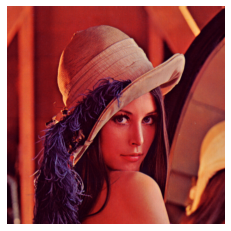

In [ ]:
img = ((lena_rgb_cvt / 255.0) ** 2) * 255.0
img = img.astype('int64')
show_img(img)